# Research on Yandix.Afisha

**The task is to help optimize marketing expenses in Yandex.Afisha**
<br/>

**We have:**
<br/>
  1. Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
  2. Dump file with all orders for the period
  3. Marketing expenses statistics

**We are going to study:**
<br/>
  1. How people use the product
  2. When they start to buy
  3. How much money each customer brings
  4. When they pay off

**We will complete the task by:**
<br/>
  1. Download the data and prepare it for analysis
  2. Make reports and calculate metrics
  3. Write a conclusion: advise marketing experts how much money to invest and where

## Download the data and prepare it for analysis

In [1]:
#importing the libraries to be used in analyzing the data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter ('ignore')

<h3>The Visits table</h3>

<h4>Overall look of the dataframe</h4>

In [2]:
visits = pd.read_csv('datasets/visits_log_us.csv')
#Getting info about size of the data, attributes, data types 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 9.6+ MB


* There are 5 columns and 359400 rows in the dataframe - Large dataframe 
* Three attributes of type object, one of type int another one of type uint
* It's possible to change types of data in order to reduce the dataframe memory usage 
* In the next step, we will change the type of: Start Ts, End Ts (contains dates)

<h4>Changing data types</h4>

In [3]:
#changing dates attributes to datetime type 
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'] , format="%Y-%m-%d %H:%M")
visits['End Ts'] = pd.to_datetime(visits['End Ts'] , format="%Y-%m-%d %H:%M")

#It's possiblee to change the type of source id to unasigned int 
visits['Source Id'] = pd.to_numeric(visits['Source Id'], downcast='unsigned')

In [4]:
#checking the unique values of the device attribute 
device_unique_values = visits['Device'].unique() 

#There are two unique values only, so better to change its type to category
visits['Device'] = visits['Device'].astype('category')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  uint8         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), uint64(1), uint8(1)
memory usage: 8.9 MB


* Memory usage decreased by approximately 4.8 MB as a result of changing the data types and downcasting of four attributes 

<h3>The Orders table</h3>

In [5]:
orders = pd.read_csv('datasets/orders_log_us.csv')
#Getting info about size of the data, attributes, data types 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 984.7+ KB


* There are 3 columns and 50415 rows in the dataframe
* One attribute of type object, one of type float another one of type uint
* In the next step, we will change the type of: Buy Ts, use downcast on Revenue 

<h4>Changing data types</h4>

In [6]:
#changing dates attribute to datetime type 
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'],format="%Y-%m-%d %H:%M")

# downcast the float type for optimization
orders['Revenue'] = pd.to_numeric(orders['Revenue'],downcast='float')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float32       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.7 KB


* Memory usage decreased by approximately 0.21 MB as a result of changing the data types and downcasting of two attributes 

<h3>The Costs table</h3>

In [7]:
costs = pd.read_csv('datasets/costs_us.csv')
#Getting info about size of the data, attributes, data types 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 49.7+ KB


* There are 3 columns and 2542 rows in the dataframe
* One attribute of type object, one of type float another one of type int
* In the next step, we will change the type of all the attributes 

<h4>Changing data types</h4>

In [8]:
#downcat int type to unasigned int
costs['source_id'] = pd.to_numeric(costs['source_id'], downcast='unsigned')
#changing dates attribute to datetime type 
costs['dt'] = pd.to_datetime(costs['dt'],format="%Y-%m-%d %H:%M")
# downcast the float type
costs['costs'] = pd.to_numeric(costs['costs'],downcast='float')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   uint8         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float32       
dtypes: datetime64[ns](1), float32(1), uint8(1)
memory usage: 32.3 KB


* Memory usage decreased by approximately 27.3 KB as a result of changing the data types and downcasting of three attributes 

<h3>Conclusion</h3>

* 15% is the approximately ratio between the size of the visits and orders table, it means there is a gap between number of visits and number of buyers.
* Large dataframes, however dataframes does not contain too many columns (5 visits, 3 orders, 3 costs)
* Date column is the mutual columns between all of the tables 
* Optimizing data by changing data types result in decreasing the size of each one of the three datasets.

##  Make reports and calculate metrics

<h3>Product</h3>

<h4>How many people use it every day, week, and month?</h4>

In [9]:
visits['session_year']  = visits['Start Ts'].astype('datetime64[Y]')
visits['session_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['session_week']  = visits['Start Ts'].astype('datetime64[W]')
visits['session_date'] = visits['Start Ts'].dt.date

In [10]:
dau_visits_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_visits_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_visits_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

In [11]:
print('Daily average: ',int(dau_visits_total))
print('Weekly average: ',int(wau_visits_total))
print('Monthly average: ',int(mau_visits_total))

Daily average:  907
Weekly average:  5621
Monthly average:  23228


<h4>How many sessions are there per day? (One user might have more than one session.)</h4>

In [12]:
sessions_per_day = visits.groupby('session_date').agg({'Uid':'count'})
print(sessions_per_day.describe())

               Uid
count   364.000000
mean    987.362637
std     418.994796
min       1.000000
25%     635.500000
50%    1003.000000
75%    1280.000000
max    4042.000000


* The count of the unique session date is 364, it's a year period
* The min value for daily non unique visitors is:1 It might be as result of website server problems at the specific day because the avergae daily visits is 907 for unique visitors, and 987 for non unique visitors 
* The max value is 4042, there is a good chance it was on sales day  

**Average per user**

In [13]:
avg_session_user = visits.groupby('Uid').agg({'Start Ts':'count'})
avg_session_user.columns = ['count_sessions']
print(avg_session_user.describe())

       count_sessions
count   228169.000000
mean         1.575148
std          4.646800
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        893.000000


* 75% of users have in aveerage one session 
* Max value is 893 which is very unusual, it might be due to:
   1. Some mistake when collecting data  
   2. Website test: site test department that ran test on the website on daily basis, and mistakenly not removing the entries from the DB
   3. Some user who extremely like the website and spent bunch of time on it daily - low probability 

In [14]:
#avg_session_user = avg_session_user.reset_index()
avg_session_user.sort_values(by=['count_sessions'],ascending=False)

,count_sessions
Uid,
12869801667763685675,893
3263486045884611639,615
11255648391090536411,551
17030528792926543083,357
8056418121947262981,343
...,...
6941514512558303452,1
6941551041544435874,1
6941737448038189076,1


In [15]:
purchases_user_high_sessions = orders.query('Uid == 12869801667763685675')
purchases_user_high_sessions.shape[0]

0

* Not a single order with the highest sessions value, it's most probably a uid for test, or some other mistake 

<h4>What is the length of each session?</h4>

In [16]:
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

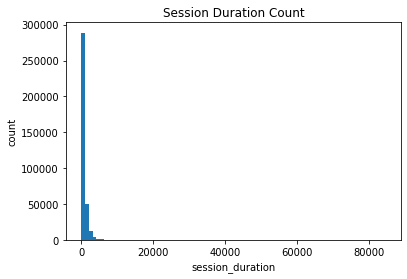

In [17]:
plt.hist(visits['session_duration'],bins=80) 
plt.xlabel('session_duration')
plt.ylabel('count')
plt.title('Session Duration Count')
plt.show()

**Distribution is  not normal, thus we will use MODE for ASL**

which the most common number in the data set(particular column)

In [18]:
print(visits['session_duration'].mode()) 

0    60
dtype: int64


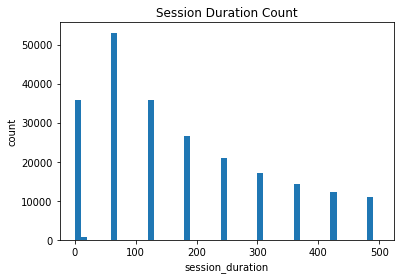

In [19]:
plt.hist(visits['session_duration'],bins=50,range=[0,500]) 
plt.xlabel('session_duration')
plt.ylabel('count')
plt.title('Session Duration Count')
plt.show()

**In the histogram above, we can see that more than 50,000 sessions out of 84480 (60%+) last 60 seconds approximately** 

* The mode is 60 seconds which is a minute length 
   * it's a short session, it might be due to long loading, or unfriendly UI on mobile version. 
* The avergae duration for a session is 643 seconds which is 10.7 minutes 
* Max value is 84480, it's 23.46 hours very high unreasonnable value, it might be as a result of error while inserting data or was inactive session(where the user left the website, while doing other stuff ) 
* Min value is 0 (user is not interested: was directed to the website closed it immediately, click on thhe ad by mistake)

<h4>How often do users come back?</h4>

In [20]:
sticky_factor_week = (dau_visits_total/wau_visits_total)*100
sticky_factor_monthly = (dau_visits_total/mau_visits_total)*100
print(sticky_factor_week)
print(sticky_factor_monthly)

Uid    16.151541
dtype: float64
Uid    3.90897
dtype: float64


* Weekly facor is 15.8%, low-moderate percentage 
* Monthly factor is 3.9%, low percentage 
* It's more likely that a user revisit the website in the same week than in the same month 
* There are few sticky users who revisit the website

**In the following steps we will calculate the Retention rate using cohorts and chohort liftime**

In [21]:
#Checking the months numbers and weeks number in the dataframe, in order to pick a period to calculate lifetime for retention
weeks_between_dates = (visits['Start Ts'].max() - visits['Start Ts'].min())/np.timedelta64(1, 'W') 
months_between_dates = (visits['Start Ts'].max() - visits['Start Ts'].min())/np.timedelta64(1, 'M') 

* There are 52 weeks between the min and max dates, it will be complicated and unclear to calculate retention for cohort lifteime between 0-52 weeks
* Thus we will calculate cohort lifetime by month(0-11) not by week 

In [22]:
#Find the first date and month the user made his first visit to the website 
first_visit_date = visits.groupby(['Uid'])['Start Ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date,on='Uid') 
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [23]:
#Find the month where the user visit the website 
visits['visits_month'] = visits['Start Ts'].astype('datetime64[M]')

In [24]:
#calculate user lifetime within the cohort for each row of the DataFrame
visits['cohort_visits_lifetime'] = (visits['visits_month'] - visits['first_visit_month'])
visits['cohort_visits_lifetime'] = visits['cohort_visits_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_visits_lifetime'] = visits['cohort_visits_lifetime'].round().astype('int')

In [25]:
#Group the data by cohort and lifetime and find the number of active users at a certain lifetime month
cohorts = (
    visits.groupby(['first_visit_month','cohort_visits_lifetime'])
    .agg({'Uid':'nunique'})
    .reset_index())

In [26]:
#retrieve the initial number of users in a cohort 
initial_users_count = cohorts[cohorts['cohort_visits_lifetime'] == 0][['first_visit_month','Uid']]
initial_users_count = initial_users_count.rename(
    columns={'Uid':'cohort_users'}
)

In [27]:
#Calculating the retention rate 
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

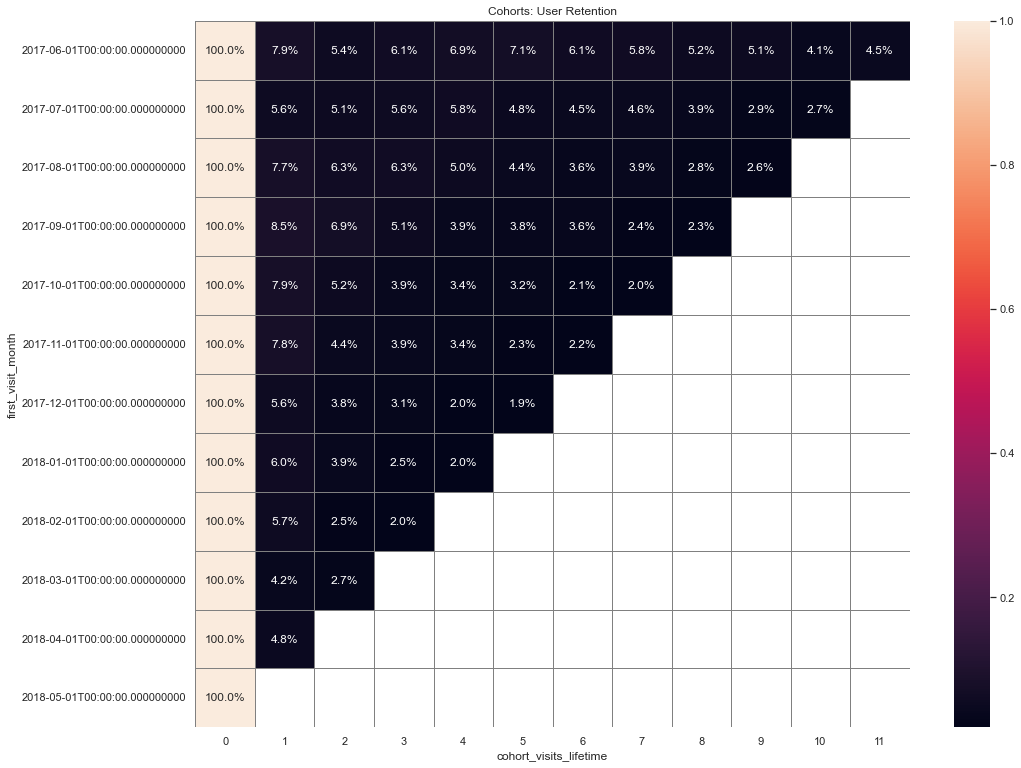

In [28]:
#heatmap 
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_visits_lifetime',
    values='retention',
    aggfunc='sum',
)


sns.set(style='white')
plt.figure(figsize=(16, 13))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
) 
plt.show()

* The retentions range from the 1st lifetime [0-8.5]
* The first-month retention rate is decreasing for each new cohort, in comparison with the previous month
* The highest retention rate belongs to 09/2017 cohort in the 1st month 8.5%
* The significant decreasing retention ratio for the different cohorts, may be due to many reasons:
   * The quaily of the team work is not good enough 
   * Other users reviews 
   * The UI is not very user friendly 
   * Slow Load Time 
   * Disappointment after order delivery or delivery process  
   * etc...    

<h4>Conclusions</h4>

* Visits decrease significantly by time, explaination above 
* Monthly Sticky factor shows very low percentage and in the retention calculation according to lifetime cohorts show the same result 

<h3>Sales</h3>

<h4>When do people start buying?</h4>

In [29]:
# Gettig the date of the first purchase for each user
first_purchase_date = orders.groupby(['Uid'])['Buy Ts'].min()
first_purchase_date.name = 'first_order_date' 
orders = orders.join(first_purchase_date,on='Uid') 
orders = orders.join(first_visit_date,on='Uid') 
print(first_purchase_date.shape[0]/orders.shape[0])

0.7244470891599722


In [30]:
# Merge first visit date with first purchase/order date 
first_orders = first_purchase_date.reset_index()
first_orders = first_orders.join(first_visit_date,on='Uid')
first_orders['first_order_month'] = first_orders['first_order_date'].astype('datetime64[M]')
first_orders['visit_days_first_order'] = (first_orders['first_order_date'] - first_orders['first_visit_date']).dt.days
first_orders['visit_days_first_order'].describe()


count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: visit_days_first_order, dtype: float64

* 75% of the buyers make their first orders after 0-2 days since their visit to the website, very short time 
    * Fast decision makers 
* The mean is 16.7 while Q3 is 2, that's due to the big difference between the max value and the values in Q3,Q2,Q1 and min value 

<h4>How many orders do they make during a given period of time?</h4>

In [31]:
orders['orders_year']  = orders['Buy Ts'].astype('datetime64[Y]')
orders['orders_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['orders_week']  = orders['Buy Ts'].astype('datetime64[W]')
orders['orders_date'] = orders['Buy Ts'].dt.date

In [32]:
dau_orders_total = orders.groupby('orders_date').agg({'Uid': 'nunique'}).mean()
wau_orders_total = orders.groupby(['orders_year', 'orders_week']).agg({'Uid': 'nunique'}).mean()
mau_orders_total = orders.groupby(['orders_year', 'orders_month']).agg({'Uid': 'nunique'}).mean()

In [33]:
print('Daily average: ',int(dau_orders_total))
print('Weekly average: ',int(wau_orders_total))
print('Monthly average: ',int(mau_orders_total))

Daily average:  127
Weekly average:  803
Monthly average:  3155


<h4>What is the average purchase size?</h4>

**Calculating the average purhase size by:**
* Convering data type of the month 
* Sum up the revenue and counting unique users according to the first order month and the order month itself
* Calculating the age of the orders according to the first order month of the particular user 
* Using pivot table to caclulate the revenue mean by the first order month and the age of the orders 

In [34]:
#converting data type 
orders['first_order_month'] = orders['first_order_date'].astype(
    'datetime64[M]'
)
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

#sum up revenue for all unique users according to the first order month and the month the order was made
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'order_month']
).agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()

# dividing the sum revenue by the number of unique users 
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['Revenue']
    / orders_grouped_by_cohorts['Uid']
) 

#calculating the age of the order lifetime 
orders_grouped_by_cohorts['cohort_orders_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)

orders_grouped_by_cohorts['cohort_orders_lifetime'] = orders_grouped_by_cohorts[
    'cohort_orders_lifetime'
] / np.timedelta64(1, 'M')


orders_grouped_by_cohorts['cohort_orders_lifetime'] = (
    orders_grouped_by_cohorts['cohort_orders_lifetime'].round().astype('int')
)

#changing the data type again into a date with year and month only
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts[
    'first_order_month'
].dt.strftime('%Y-%m')

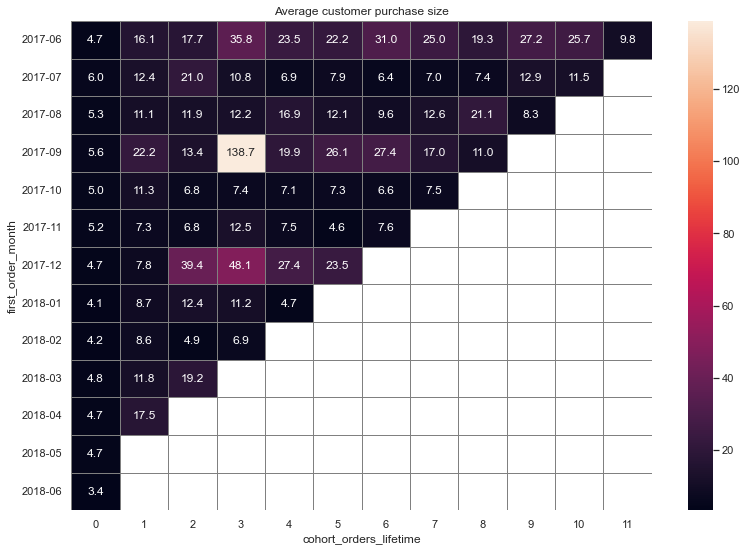

In [35]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_orders_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)
plt.figure(figsize=(13, 9))
vmin = 3.4
vmax = 138.7
plt.title('Average customer purchase size')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    vmin=vmin,
    vmax=vmax,
    linecolor='gray',
) 
plt.show()

* For every cohort, the first month has the lowest revenue average 
* 9/2017 fourth month, the revenue increased significantly may be due to big orders from different users
  * the same for 12/2017 on the second and third months 
* In general it can be concluded that users do not make big orders from the website 

<h4>How much money do they bring? (LTV)</h4>

In [36]:
#Calculating the numbers of unqiue number according to first order month 
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

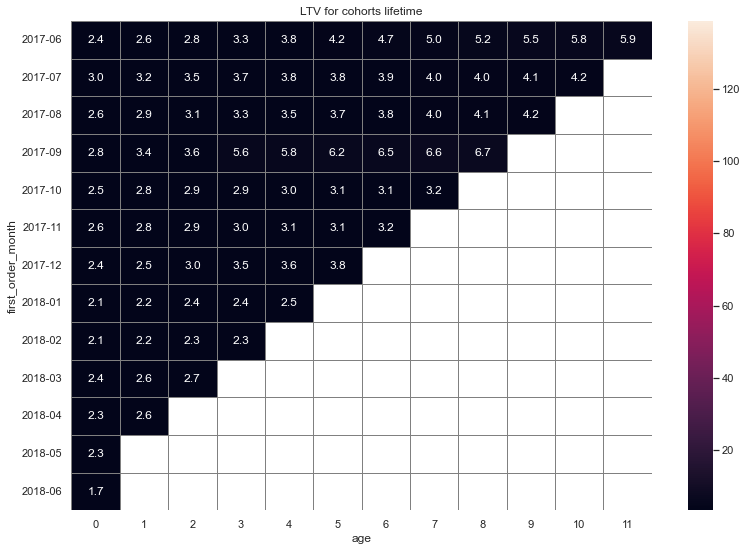

In [37]:
#calculating the revenue by the o=first order month and the order month itself 
cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

#merging the cohort size table with the cohort table (res tab: first_order_month,order_month,revenue,n_buyers)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 0.5

#calculating the gross profit by multiplying margin rate by revenue 
report['gp'] = report['Revenue'] * margin_rate

#calculating ltv by dividing gp from number of buyers
report['ltv'] = report['gp'] / report['n_buyers']

#calculating the age of the each order
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#changing data type of the first order month to conatin only year and month
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)
#calculating the cumulative LTV
output_cumsum = output.cumsum(axis=1).round(2) 
output_cumsum.fillna('') 
plt.figure(figsize=(13, 9))
plt.title('LTV for cohorts lifetime')
sns.heatmap(
    output_cumsum,
    annot=True,
    fmt='.1f',
    linewidths=1,
    vmin=vmin,
    vmax=vmax,
    linecolor='gray',
) 
plt.show()

In [38]:
# LTV sum for each first order month 
ltv_monthly_sum = report.groupby(['first_order_month']).agg({'ltv':'sum'}).reset_index()
print(ltv_monthly_sum)

   first_order_month       ltv
0            2017-06  5.939617
1            2017-07  4.193427
2            2017-08  4.235861
3            2017-09  6.717613
4            2017-10  3.180121
5            2017-11  3.197622
6            2017-12  3.819957
7            2018-01  2.470076
8            2018-02  2.293961
9            2018-03  2.727627
10           2018-04  2.594598
11           2018-05  2.330281
12           2018-06  1.710000


In [39]:
#calculating the cumulative avg LTV
output.cumsum(axis=1).mean(axis=0) 

age
0     2.400841
1     2.697833
2     2.910905
3     3.344881
4     3.649317
5     3.984526
6     4.193843
7     4.541791
8     5.031042
9     4.625670
10    5.002308
11    5.939617
dtype: float64

* The mean distribution is nice here, ages - mean: 
   * [0,1,2] - [2.4,2.7,2.9]
   * [3,4,5] - [3.3,3.6,3.9]
   * [6,7,9] - [4.2,4.5,4.6]
   * [8,10,11] - [5.01,5.03,5.95]
* The whole number(without rounding) for mean value for each quarter above is the same: 2,3,4,5 

* Average revenue increase as the age increase i.e new users buy more 
* On average each customer from the first cohort brought 5.9 in revenue over their twelve-month(year) liftetime. 
  * which is the highest average revenue among the cohorts groups
* On the table that shows the revenue sum for each cohort group:
   * we can see that 09/17 has the highest value
   * in the other hand in the average table it's not on the first rank 
   * it might be due to the values distribuation on this group 
* cohort groups of 2018 months average revenue for a customer range [2.4-3.98]
   * There is a gap between the values in the avg table and the sum table on 2018 months
   * The gap is due to the age values in these groups (small), thus using the sum here is not a good choice because it doesn't refelect the 'picture' properly 

<h4>Conclusions</h4>

* 28% of the buyers, make at least one additional order except of the first one
* LTV and revenue per user shows that the orders the buyers make are usually small
* As the cohort group age decrease, revenue decrease i.e revenue decrease over time 
* Users of 6,7,9 2017 cohort groups bring the most revenue to the company
* Users of 6/17 bring the highest revenue, users of 06/2018 bring the least value

<h3>Marketing</h3>

<h4>How much money was spent? Overall/per source/over time</h4>

**How much money was spent? Overall**

In [40]:
costs_sum = costs['costs'].sum()

**How much money was spent? per source**

In [41]:
costs_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
print(costs_per_source)
print(costs['source_id'].unique())

   source_id          costs
0          1   20833.269531
1          2   42806.039062
2          3  141321.625000
3          4   61073.601562
4          5   51757.101562
5          9    5517.490234
6         10    5822.490234
[ 1  2  3  4  5  9 10]


* The third traffic source has the highest investment sum
* There is no data about 6,7 sources 

**How much money was spent? over time**

In [42]:
costs['costs_year']  = costs['dt'].astype('datetime64[Y]')
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs['costs_week']  = costs['dt'].astype('datetime64[W]')
costs['costs_date'] = costs['dt'].dt.date

In [43]:
dau_costs_total = costs.groupby('costs_date').agg({'costs': 'sum'}).mean()
wau_costs_total = costs.groupby(['costs_year', 'costs_week']).agg({'costs': 'sum'}).mean()
mau_costs_total = costs.groupby(['costs_year', 'costs_month']).agg({'costs': 'sum'}).mean()
print('Daily average: ',int(dau_costs_total))
print('Weekly average:',int(wau_costs_total))
print('Monthly average:',int(mau_costs_total))

Daily average:  904
Weekly average: 6095
Monthly average: 27427


In [44]:
year_costs = costs.groupby('costs_year').agg({'costs':'sum'})
print(year_costs)

                   costs
costs_year              
2017-01-01  187961.15625
2018-01-01  141170.46875


* Marketing investments in 2018 decrease by 24%
* From the previous finding we saw that in 2018 there are less revenue, it might be due to marketing investment changes 

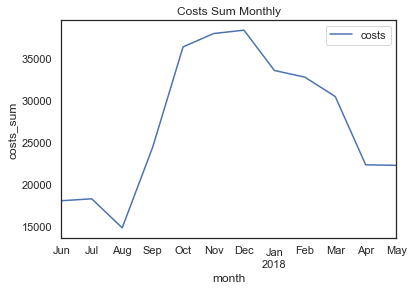

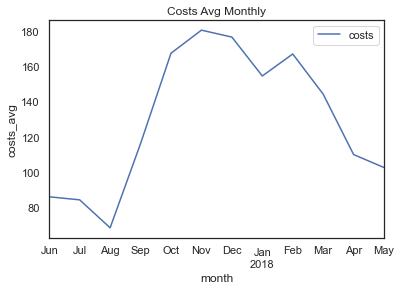

In [45]:
month_costs_sum = costs.groupby(['costs_month']).agg({'costs': 'sum'}).plot()
plt.ylabel('costs_sum')
plt.xlabel('month')
plt.title('Costs Sum Monthly')
month_costs_mean = costs.groupby(['costs_month']).agg({'costs': 'mean'}).plot()
plt.ylabel('costs_avg')
plt.xlabel('month')
plt.title('Costs Avg Monthly')
plt.show()

* Cost investment at the first three month were the lowest:
  * Yet in the first months revenue were the highest
* The through(min val) of the investment occured on AUG 17, yet the revenue in this month didn't change signficantly in comparison to the prev and next month 
* Investment start to increase on 9/17, on this month in particular revenue increased as well 
* The peak of the investment occured on NOV 17 and changed slightly on the following month 
  * yet there were no significant increasing on the revenue sum
* Mean graph and Sum graph look similar somehow 
* peaks and throughs occur in the same places and look the same(in terms of sharpness), except of
   1. The through on JAN 18
   2. The peak on FEB 18   
      in the mean chart value they are very sharp

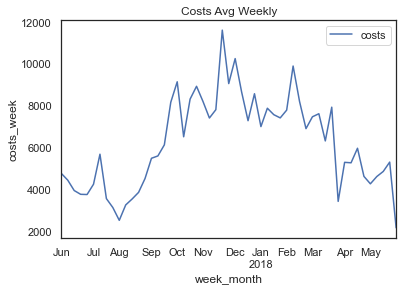

In [46]:
week_costs_mean = costs.groupby(['costs_week']).agg({'costs': 'sum'}).plot()
plt.ylabel('costs_week')
plt.xlabel('week_month')
plt.title('Costs Avg Weekly')
plt.show()

* On the week chart there are many sharp points
* The through point on this graph occured on a week at the end of MARCH 18 
* The peak point occure on a week at the end of NOV 17
* we can't say the investment increase/decrease over the weeks, there is ups and downs along the whole graph 
* On the last week we can see that the investment decreased and continue with the same behaviour

* Investment are larger than the Revenue 
* Probably there is no direct relation between revenue and marketing
  * First 3 months of 17 low investment, high revenue 
  * AUG 17, very low investment, revenue didn't change signficantly
  * DEC NOV , high investment, revenue didn't change signficantly 
* Big difference between the orders count and the investment  

<h4>How much did customer acquisition from each of the sources cost?</h4>

**In order to calculate the cac for each source, we need: **
* Calculate number of buyers from each source 
* Divide the costs for each source from the number of buyers.

  *the issue is: we do not have the source column on the orders table where we can find the buyers number, we will need to create temp table to extract the desired data and merge with the relevant table*
  
  
1. We need to find for each user(by Uid) from the visits table, his source from his first visit date and save on seperate table 
2. Merge the table above with the orders table only add one column to orders table (source_id)
3. Create new table which contains source id with buyers numbers by grouping by source id and count unique users from orders table 
4. Merge the table created above with the table costs_per_source (costs pfor each source) from 2.3.1
5. We get the cac by dividing the costs_source by buyers count 

In [47]:
#table which contain the uid and the first visit date 
first_visit_date = visits.groupby(['Uid'])['Start Ts'].min()
#change column name
first_visit_date.name = 'first_visit_date'

#table which contain the uid,source, and date 
table_temp = visits[['Uid','Source Id','Start Ts']]
#changing the column name for the next step
table_temp.columns = ['Uid','source_id','first_visit_date']
first_visit_date = first_visit_date.reset_index()

#merging first_visit_date with temp table 
users_src_temp = pd.merge(table_temp,first_visit_date, on = ['Uid','first_visit_date'])

#removing date column, we only need uid and source_id columns 
users_src = users_src_temp.drop(columns=['first_visit_date'])
#merging the resulted modified table with orders table, order table have one new column 'source_id'
orders = orders.merge(users_src,on='Uid',how='left')


In [48]:
#grouping by source id calculate unique number of users save table as source_id_cohort 
source_id_cohort = orders.groupby(['source_id']).agg({'Uid':'nunique'}).reset_index()
#change column names
source_id_cohort.columns=['source_id','count_buyers']

#merge resulted tabke above with the table 'costs_per_source' from step 2.3.1
source_id_cohort = source_id_cohort.merge(costs_per_source,on='source_id',how = 'left') 

#calculating cac by dividing costs from buyers numbers, grouped by source_id
source_id_cohort['cac'] = source_id_cohort['costs']/source_id_cohort['count_buyers']
print(source_id_cohort)

   source_id  count_buyers          costs        cac
0          1          2899   20833.269531   7.186364
1          2          3506   42806.039062  12.209367
2          3         10473  141321.625000  13.493901
3          4         10296   61073.601562   5.931779
4          5          6931   51757.101562   7.467480
5          7             1            NaN        NaN
6          9          1088    5517.490234   5.071223
7         10          1329    5822.490234   4.381106


**EXTRA** 
* Adding the revenue column
* Calculate ltv
* Calculate romi

In [49]:
#calculate revenue per source and save the table as 'revenue_src'
revenue_src = orders.groupby(['source_id']).agg({'Revenue':'sum'}).reset_index()

#change columns names 
revenue_src.columns=['source_id','revenue_total']

#merge the table 'revenue_src' with source_id_cohort from previous step
source_id_cohort = source_id_cohort.merge(revenue_src,on='source_id',how = 'left')

#calculate ltv by dividing the revenue by buyers numbers 
source_id_cohort['ltv'] = source_id_cohort['revenue_total']/source_id_cohort['count_buyers']

#calculate romi by dividing ltv from cac 
source_id_cohort['romi'] = source_id_cohort['ltv']/source_id_cohort['cac']
source_id_cohort.sample(8)

,source_id,count_buyers,costs,cac,revenue_total,ltv,romi
3,4,10296,61073.601562,5.931779,56696.832031,5.506685,0.928336
7,10,1329,5822.490234,4.381106,4450.330078,3.348631,0.764334
6,9,1088,5517.490234,5.071223,5759.399902,5.293566,1.043844
1,2,3506,42806.039062,12.209367,46923.609375,13.383802,1.096191
2,3,10473,141321.625000,13.493901,54511.238281,5.204931,0.385725
5,7,1,NaN,NaN,1.220000,1.220000,NaN
4,5,6931,51757.101562,7.467480,52624.019531,7.592558,1.016750
0,1,2899,20833.269531,7.186364,31090.550781,10.724578,1.492351


* There are no investments on three source, 1 of these source bring small number of buyers (7) 
* Source 1, marketing costs in rank 5, buyers count in rank 5, ltv in rank 2, romi is the highest. 
* Source 2, marketing costs in rank 4, buyers count in rank 4. ltv is the highest, romi in rank 2. 
* Source 3 is in rank 1 which bring most of the buyers, however the marketing costs are the highest, lowest romi among other sources. 
   * **High number of buyers doesn't necessarily mean high revenue, because it still depends on the marketing costs to get these buyers.**
* Source 4 is in rank 2 which bring most of the buyers, the marketing costs are significantly lower with comparison to source 3.
   * There is no such a difference between number of buyers, yet big difference between the CAC's
   * ltv of source  4 higher as well (no significant difference)
   * For both of the sources ltv lower than cac, which means that there are no profit.
   * investments need to be reconsidered on both of the sources (3,4)
* Source 5, marketing costs is in rank 3, buyers count is in rank 3. 
   * romi is 1.01 it is in rank 4 
   * Marketing costs should be reconsidered here
* Source 9, in rank 1 which cost the least.
   * romi in the rank 3
   * buyer count in the rank 7
   * might be a good idea to invest more and bring more buyers


* 4 sources can be considered as profitable 1,2,5,9
* Source 3, highest cost, lowest revenue, lowest romi
* In the sources 2,5: romi is 1+, yet cac is high on both of these sources
   * Marketing investment should be reconsidered here 
   * The sources do not bring the highest numbers of buyers, but they can bring profit
* here in this table it is confirmed that users do not make big orders from the website 

<h4>How worth while where the investments? (ROI)</h4>

In [50]:
#new table 'monthly_costs' contains: month, costs sum 
monthly_costs = costs.groupby('costs_month').agg({'costs':'sum'}).reset_index()
monthly_costs['costs_month'] = monthly_costs['costs_month'].dt.strftime('%Y-%m')
print(monthly_costs)

   costs_month         costs
0      2017-06  18015.000000
1      2017-07  18240.589844
2      2017-08  14790.540039
3      2017-09  24368.910156
4      2017-10  36322.878906
5      2017-11  37907.878906
6      2017-12  38315.351562
7      2018-01  33518.519531
8      2018-02  32723.029297
9      2018-03  30415.269531
10     2018-04  22289.380859
11     2018-05  22224.269531


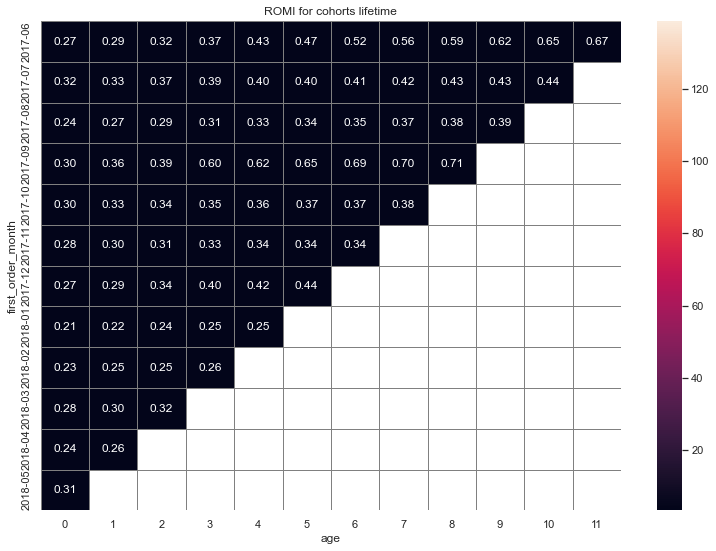

In [51]:
#merge report table(step 2.2.4)  with monthly costs 
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='costs_month')

#calculatig cac by dividng costs by buyers numbers
report_['cac'] = report_['costs'] / report_['n_buyers']

#calculatig romi by dividng ltv by cac
report_['romi'] = report_['ltv']/ report_['cac']

#using pivot table to calc mean of romi grouping by first order month and age 
result_romi = pd.pivot_table(
    report_,
    index='first_order_month',
    columns='age',
    values='romi',
    aggfunc='mean'
)

#calculating the cumulative ROMI
result_romi = result_romi.cumsum(axis=1).round(2) 
result_romi.fillna('') 
plt.figure(figsize=(13, 9))
plt.title('ROMI for cohorts lifetime')
sns.heatmap(
    result_romi,
    annot=True,
    fmt='.2f',
    linewidths=1,
    vmin=vmin,
    vmax=vmax,
    linecolor='gray',
) 
plt.show()

In [52]:
#calculating the cumulative avg ROMI
age_avg_romi = result_romi.cumsum(axis=1).mean(axis=0)
print(age_avg_romi)

age
0     0.270833
1     0.558182
2     0.881000
3     1.241111
4     1.666250
5     2.167143
6     2.615000
7     3.176000
8     3.797500
9     3.870000
10    4.715000
11    5.760000
dtype: float64


* The business does not seem healthy
* Romi cumulative values for each cohort is getting larger by time.
* For all the cohorts highest romi value occured in the last month 
* the romi increased by age yet it is still low with no profit 
* On average, cohorts do not pay off. 

In [53]:
#general calc of romi by using the formula: (expenses - revenue)/expenses *100 
total_costs = costs['costs'].sum()
total_revenue = orders['Revenue'].sum()
romi_general = ((total_revenue - total_costs)/total_costs)*100
print(romi_general)

-23.417499661445618


<h4>Conclusions</h4>

* Marketing Investment were very high, did not paid off 
* It might be due to a mistake in choosing the right traffic sources to invest mostly in
* Most profitable sources: 1,2,9,5
* Least profitable sources: 3,10 
* marketing industry should reduce investment in source 3, because it costs them the most without any profit. 
* In overall look, There are 23.4% of the investmens have not been recouped

## Write a conclusion: advise marketing experts how much money to invest and where.

1. In step 1: 
    * we took an overlook on the three tables: visits, orders, costs
    * We optimize the data by changing the some of the data types on all of the three tables 
2. In step 2: 
    * we make reports for each one of the tables 
    * On the Product report we found:
      * the daily, monthly yearly visits average 
      * Visits decrease significantly by time  
      * The max daily visits average value is 4042, there is a good chance it was on sales day  
      * The avergae duration for a session is 643 seconds which is 10.7 minutes 
      *  It's more likely that a user revisit the website in the same week than in the same month 
      * Monthly Sticky factor shows very low percentage and in the retention calculation according to lifetime cohorts show the         same result
    *  On the Orders report we found:
       * 75% of the buyers make their first orders after 0-2 days since their visit to the website, very short time
       * For every cohort (monthly), the first month has the lowest revenue average 
       * users do not make big orders from the website 
       * 28% of the buyers, make at least one additional order except of the first one
    * On the Costs report we found: 
       * Investment are larger than the Revenue 
       * Big difference between the orders count and the investment  
       * Most profitable sources: 1,2,9,5
       * Least profitable sources: 3,10
       * There are 23.4% of the investmens have not been recouped
       * investment in customer acquisition did not paid off neither led to profit
       * marketing team should reconsider its techniques and stratigies(or be replaced ) particulary in source 3 (the most costing source)
       * Marketing team must bring strategies to bring profit so that:
            * 23% of the previous investments be recouped
            * all of the new costs be recouped and lead to profit as well     